Homework 3

Error analyzing face: Face could not be detected in numpy array.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


(-0.5, 999.5, 747.5, -0.5)

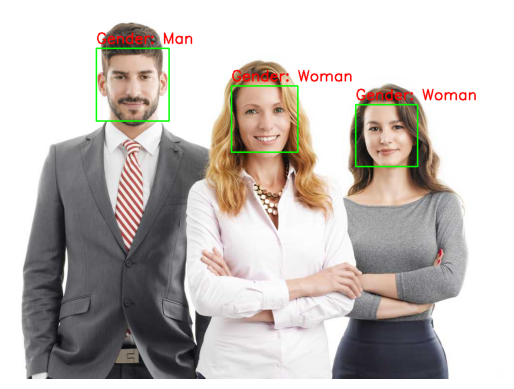

In [5]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

def img_detect_gender(img):
    # Read file image
    img_org = cv2.imread(img)

    # Use Haar Cascade to detect face
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert image to grey
    gray = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)

    # Get face objects
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Clone image
    img_copy = img_org.copy()

    # Draw frame and detect gender
    for (x, y, w, h) in faces:
        face_obj = img_org[y:y+h, x:x+w]
        try:
            result = DeepFace.analyze(face_obj, actions = ['gender'], silent = True)
            gender = result[0]['dominant_gender']
            cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img_copy, f"Gender: {gender}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        except Exception as e:
            print(f"Error analyzing face: {e}")

    # Convert image to RGB
    detect_obj_RGB = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

    return detect_obj_RGB

img = img_detect_gender("people.jpg")
plt.imshow(img)
plt.axis("off")